In [ ]:
#Library
import pandas as pd                                 #Proses Analisis Data
import matplotlib.pyplot as plt                     #Visualisasi Data
import seaborn as sns                               #Visualisasi Data
from sklearn.preprocessing  import LabelEncoder     #Mengubah kategorik menjadi dummy
from sklearn.preprocessing import StandardScaler   

from kmodes.kmodes import KModes                    #Pemodelan KMods
from kmodes.kprototypes import KPrototypes          #Pemodelan KPrototypess
  
import pickle                                       #Untuk melakukan penyimpanan dari model yang akan di buat.
from pathlib import Path

In [ ]:
# Deskripsi Statistik
# import dataset  
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t")
print('\033[92m' +' 5 Data Teratas:\033[0m')
print(df.head())         #Menampilkan Data teratas
print('\n')
print('\033[92m' +' Data Info:\033[0m')
print(df.info())         #Info Data

 5 Data Teratas:
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

<Figure size 432x288 with 0 Axes>

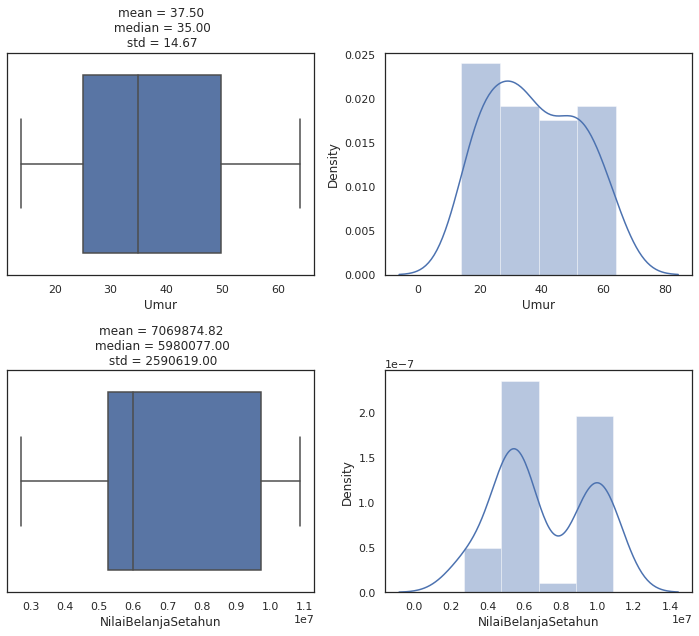

In [ ]:
#sebaran data numerik
sns.set(style='white')
plt.clf()
  
# Fungsi untuk membuat plot  
def sebarandata(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.tight_layout()
    plt.show()
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
sebarandata(kolom_numerik)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

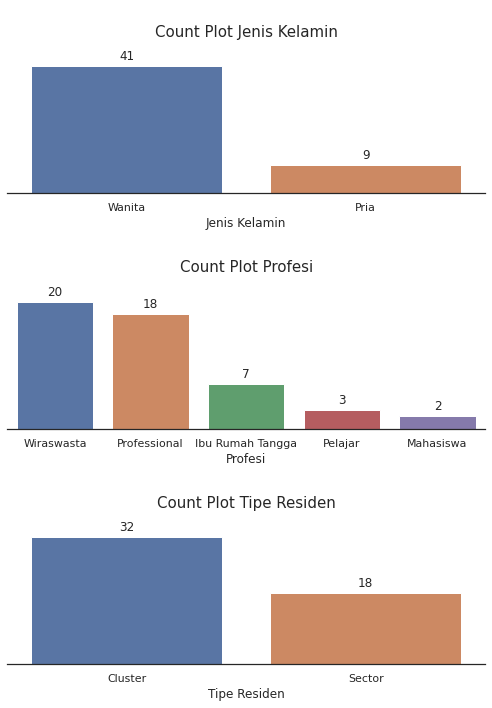

In [ ]:
#sebaran data Katagorik
plt.clf() 
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi', 'Tipe Residen'] 
# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 
# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points')      
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.tight_layout()

# Tampilkan plot
plt.show()

In [ ]:
## Pre-Processing Data
print('\033[92m' +'Sebelum standardisasi:\033[0m')
print(df[kolom_numerik].head())

kolom_numerik = ['Umur','NilaiBelanjaSetahun']
# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])
# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('\033[92m' +'Contoh hasil standardisasi:\033[0m')
print(df_std.head())


Sebelum standardisasi:
   Umur  NilaiBelanjaSetahun
0    58              9497927
1    14              2722700
2    48              5286429
3    53              5204498
4    41             10615206
Contoh hasil standardisasi:
       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421


In [ ]:
# Inisiasi nama kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']
print('\033[92m' +'Sebelum di Konvensi Katagorik Jadi Angka:\033[0m')
print(df[kolom_kategorikal].head())

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()


# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
		df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print('\033[92m' +'Sesudah Konvensi Katagorik Jadi Angka:\033[0m')
print(df_encode.head())

Sebelum di Konvensi Katagorik Jadi Angka:
  Jenis Kelamin       Profesi Tipe Residen
0          Pria    Wiraswasta       Sector
1        Wanita       Pelajar      Cluster
2          Pria  Professional      Cluster
3          Pria  Professional      Cluster
4        Wanita    Wiraswasta      Cluster
Sesudah Konvensi Katagorik Jadi Angka:
   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


In [ ]:
#Analisis
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print (df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


In [ ]:
!pip install KPrototypes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


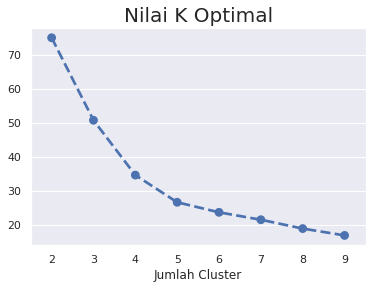

In [ ]:
# Jumlah Kluster
# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.set_theme(style="darkgrid")
sns.pointplot(x=list(cost.keys()), y=list(cost.values()), linestyles=["--"]) 
plt.title('Nilai K Optimal', fontsize=20)
plt.xlabel('Jumlah Cluster')
plt.show()


In [ ]:
# Menggunakan Model
kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

In [ ]:
# Menentukan segmen tiap pelanggan
clusters = kproto.predict(df_model, categorical=[0,1,2])
# Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head())   


  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        1  
1      Cluster              2722700        0  
2      Cluster              5286429        2  
3      Cluster              5204498        2  
4      Cluster             10615206        3  


In [ ]:
df_final.to_csv('hasil pengelompokan customer.csv')

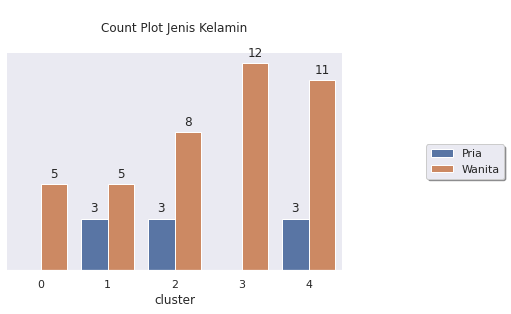

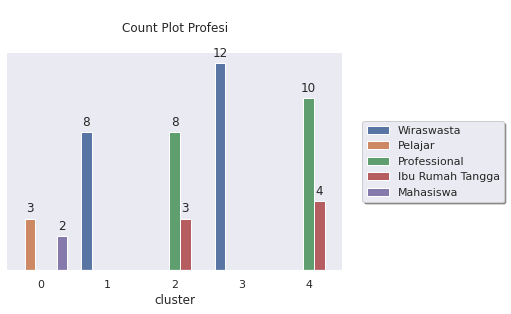

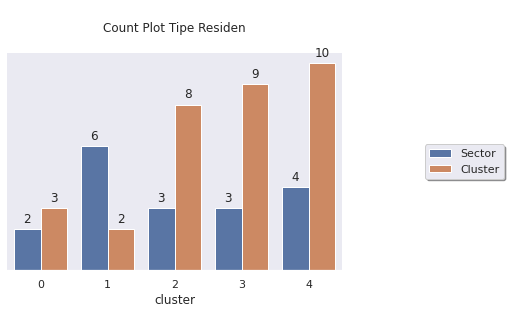

In [ ]:
# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc='right', bbox_to_anchor =(1.5,0.5), shadow = True, ncol=1)  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  

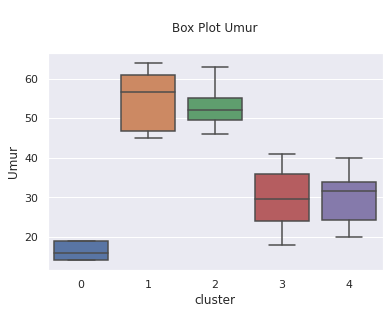

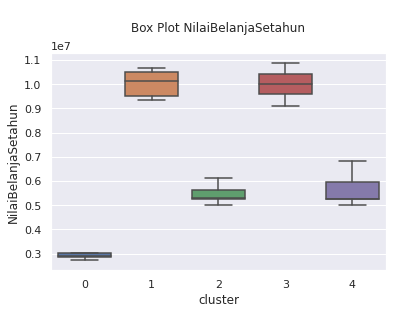

In [ ]:
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show()  